In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Succ on Location clustring

In [2]:
Data = pd.read_excel('FixLabel.xlsx')
Data

,Unnamed: 0.1,Unnamed: 0,neighbhood_id,lat,lng,types,delivery,dine_in,schoolNum,companieNum,officeNum,HotelNum,parksNum,total_labor,Teens,20s,30s,40s,50s,60s,FemalePop,MalePop,Succ,TotPop,neighbhood,CompNum
0,0,0,19,24.765344,46.670992,0,0,1,20,20,20,20,7,28817,6058,10390,12516,7168,3620,1473,21418,27407,1,48825,al bariah,33
1,1,1,20,24.606903,46.706532,0,1,1,20,20,20,20,5,28817,6058,10390,12516,7168,3620,1473,21418,27407,1,48825,ar rayan,31
2,2,2,100,24.775514,46.708765,1,1,1,20,20,20,20,6,28817,6058,10390,12516,7168,3620,1473,21418,27407,1,48825,az zahra,30
3,3,3,55,24.642315,46.545398,1,1,1,20,20,20,20,6,16967,3567,6117,7369,4220,2131,867,12616,16130,1,28746,al uraija,29
4,4,4,99,24.760087,46.603459,1,1,1,20,20,20,20,5,16967,3567,6117,7369,4220,2131,867,12616,16130,1,28746,al dho,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,2435,2435,70,24.790299,46.672270,0,1,1,20,20,20,20,5,16967,3567,6117,7369,4220,2131,867,12616,16130,1,28746,ar rayan,31
2436,2436,2436,29,24.716602,46.697853,0,1,1,20,20,20,20,6,28817,6058,10390,12516,7168,3620,1473,21418,27407,1,48825,ar raid,31
2437,2437,2437,76,24.801610,46.673787,0,1,1,20,20,20,20,6,28817,6058,10390,12516,7168,3620,1473,21418,27407,1,48825,ar rahmaniyah,31
2438,2438,2438,90,24.697761,46.729985,0,1,1,20,20,20,20,4,28817,6058,10390,12516,7168,3620,1473,21418,27407,1,48825,an nur,32


In [7]:
shops

,Unnamed: 0,place_id,name,neighbhood,nameAr,lat,lng,types,rating,user_ratings_total,rated1,rated2,rated3,rated4,rated5,delivery,dine_in,isLoved,schoolNum,companieNum,officeNum,HotelNum,parksNum,revenues,FemaleNonSaudi,MaleNonSaudi,FemaleSaudi,MaleSaudi,total_labor,Teens,20s,30s,40s,50s,60s,cluster_label,LowRates,HighRates,neighbhood_id
0,0,ChIJS-Jh3iyrLz4Rjtjm5CTUI6M,12 Cups,al muruj,المروج,24.765344,46.670992,Coffee,4,201,1,0,0,2,5,False,True,1,20,20,19,16,10,179025,5106,9369,11245,12313,22447,4719,8093,9750,5584,2819,1147,1,25,175,19
1,1,ChIJ09m0boYHLz4Rrr-umobazuM,ميركاتو كافيه,siyah,صياح,24.606903,46.706532,Coffee,4,477,2,2,0,0,2,True,True,0,20,6,9,3,6,92270,730,1429,612,708,2053,431,740,891,510,257,104,0,318,159,20
2,2,ChIJtRe5Lg3jLj4Ru-kQCIQCd6g,Burn & Build,al izdihar,الازدهار,24.775514,46.708765,Restaurants,3,471,2,0,0,2,2,True,True,0,20,20,15,18,9,160156,3600,5596,9286,9817,16702,3511,6022,7254,4154,2098,853,1,157,314,100
3,3,ChIJQcGIPZEFLz4R4vHMKSIWeW0,مطعم الشيف البخاری,al mahdiyah,المهدية,24.642315,46.545398,Restaurants,3,477,0,3,2,1,2,True,True,1,19,11,3,15,1,80237,17,191,902,1159,1339,281,482,581,333,168,68,0,178,178,55
4,4,ChIJtUfS-lr_Lj4RrP8yHJ0Zu4Q,Meat it | ميت ات,hittin,حطين,24.760087,46.603459,Restaurants,4,201,1,1,0,1,7,True,True,1,10,17,7,2,2,206933,1814,3895,3188,3389,7251,1524,2614,3149,1803,910,370,1,40,160,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,1812,ChIJcb-Q7gYHLz4RT6R2_zIkbv4,zumaward Restaurant,al ulaya,العليا,24.713552,46.675296,Restaurants,0,0,0,0,0,0,0,True,True,0,20,20,20,20,6,204906,21832,24261,21005,30553,57635,12116,20781,25033,14337,7240,2946,0,0,0,9
1813,1813,ChIJ--MZZAqrLz4RJfeHcYRCPNs,EYAD,al mahdiyah,المهدية,24.621780,46.522452,Coffee,0,0,0,0,0,0,0,True,True,0,20,5,2,4,0,125855,17,191,902,1159,1339,281,482,581,333,168,68,0,0,0,65
1814,1814,ChIJFXnk7voPLz4RxA2pbPfKWXA,مطعم الوادي الهندي,dhahrat namar,ظهرة نمار,24.570301,46.613558,Restaurants,3,1405,2,0,1,0,4,True,True,1,20,13,8,14,3,103758,126,2529,1207,1701,3283,690,1183,1426,816,412,167,1,401,802,96
1815,1815,ChIJ9XhgvdYdLz4RO39-7l9xBW4,Abdullah Al Qahtani Buffet,areed,عريض,24.487150,46.622172,Restaurants,0,0,0,0,0,0,0,True,True,0,18,3,1,0,1,70777,7,734,252,448,850,178,306,369,211,106,43,0,0,0,48


In [8]:
def radias(r, lat, lng):
    
    maxlat = lat + r
    minlat = lat - r
    maxlng = lng + r
    minlng = lng - r
    
    return maxlat, minlat, maxlng, minlng

In [11]:
#get succ competitors amount for each shop
Data['CompNum'] = 0
for i in range(len(Data)):
    maxlat, minlat, maxlng, minlng = radias(0.01500, Data['lat'][i], Data['lng'][i])
    df = Data[(Data['lat'] < maxlat) & (Data['lat'] > minlat) & (Data['lng'] < maxlng) & (Data['lng'] > minlng)]
    df = df[df['Succ'] == 1]
    Data['CompNum'][i] = len(df)
Data

,Unnamed: 0.1,Unnamed: 0,neighbhood_id,lat,lng,types,delivery,dine_in,schoolNum,companieNum,officeNum,HotelNum,parksNum,total_labor,Teens,20s,30s,40s,50s,60s,FemalePop,MalePop,Succ,TotPop,neighbhood,CompNum
0,0,0,19,24.765344,46.670992,0,0,1,20,20,20,20,7,28817,6058,10390,12516,7168,3620,1473,21418,27407,1,48825,al bariah,23
1,1,1,20,24.606903,46.706532,0,1,1,20,20,20,20,5,28817,6058,10390,12516,7168,3620,1473,21418,27407,1,48825,ar rayan,9
2,2,2,100,24.775514,46.708765,1,1,1,20,20,20,20,6,28817,6058,10390,12516,7168,3620,1473,21418,27407,1,48825,az zahra,37
3,3,3,55,24.642315,46.545398,1,1,1,20,20,20,20,6,16967,3567,6117,7369,4220,2131,867,12616,16130,1,28746,al uraija,18
4,4,4,99,24.760087,46.603459,1,1,1,20,20,20,20,5,16967,3567,6117,7369,4220,2131,867,12616,16130,1,28746,al dho,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2435,2435,2435,70,24.790299,46.672270,0,1,1,20,20,20,20,5,16967,3567,6117,7369,4220,2131,867,12616,16130,1,28746,ar rayan,36
2436,2436,2436,29,24.716602,46.697853,0,1,1,20,20,20,20,6,28817,6058,10390,12516,7168,3620,1473,21418,27407,1,48825,ar raid,21
2437,2437,2437,76,24.801610,46.673787,0,1,1,20,20,20,20,6,28817,6058,10390,12516,7168,3620,1473,21418,27407,1,48825,ar rahmaniyah,13
2438,2438,2438,90,24.697761,46.729985,0,1,1,20,20,20,20,4,28817,6058,10390,12516,7168,3620,1473,21418,27407,1,48825,an nur,7


In [12]:
Data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'neighbhood_id', 'lat', 'lng', 'types',
       'delivery', 'dine_in', 'schoolNum', 'companieNum', 'officeNum',
       'HotelNum', 'parksNum', 'total_labor', 'Teens', '20s', '30s', '40s',
       '50s', '60s', 'FemalePop', 'MalePop', 'Succ', 'TotPop', 'neighbhood',
       'CompNum'],
      dtype='object')

<Axes: >

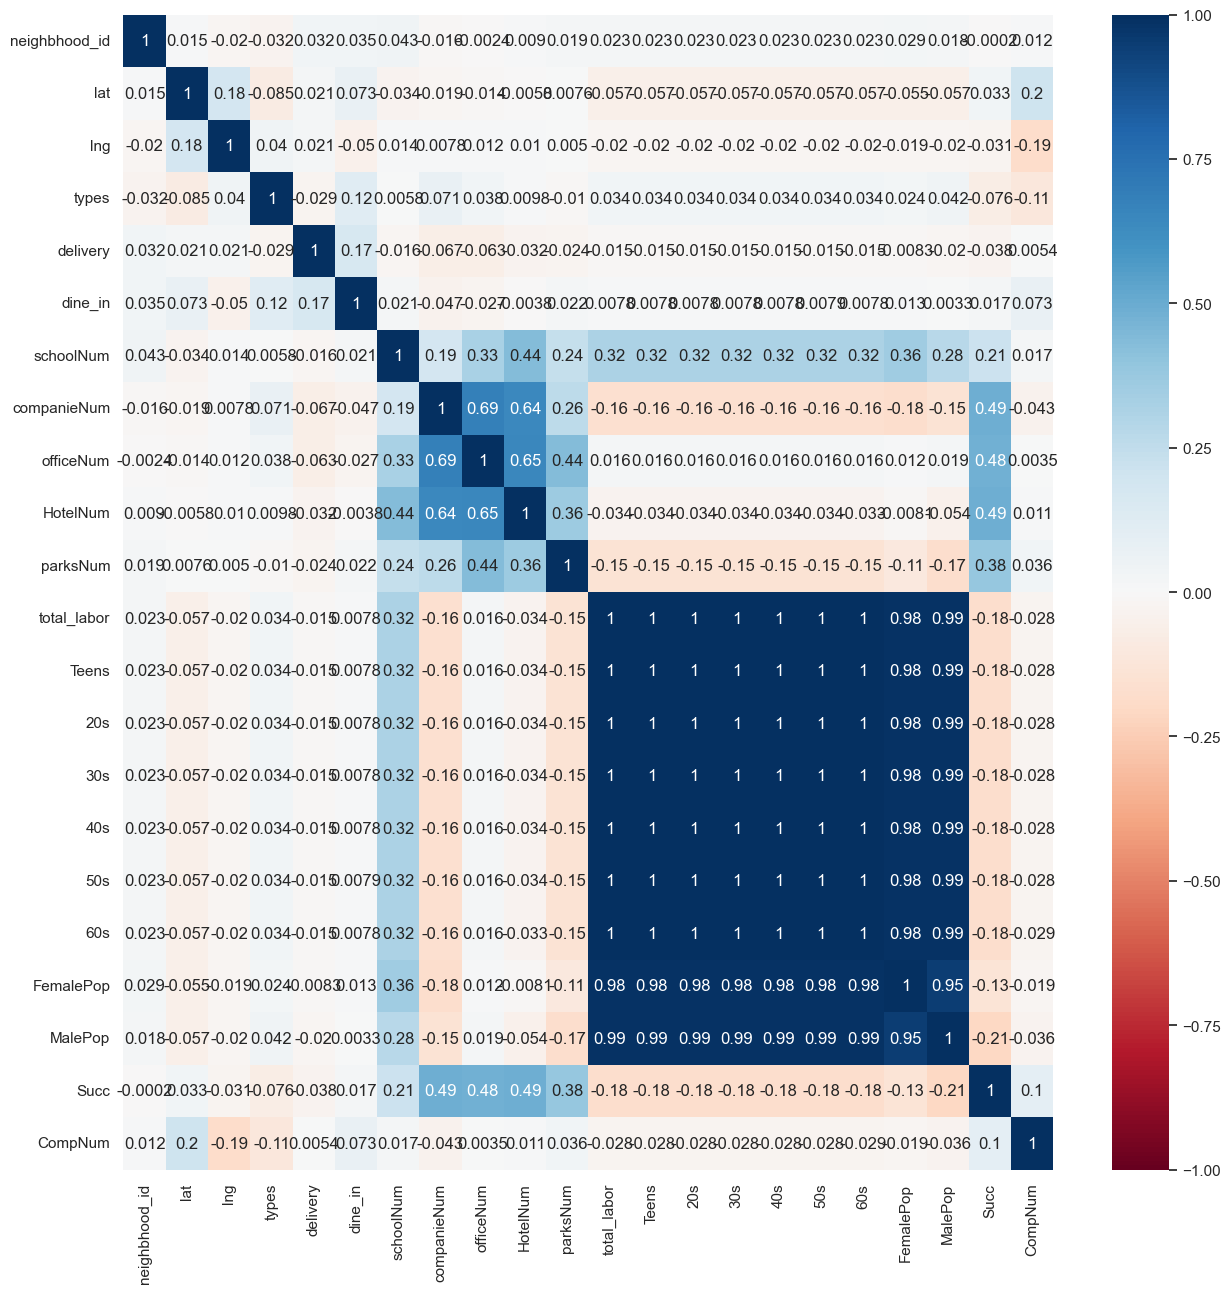

In [13]:
data = Data[['neighbhood_id', 'lat', 'lng', 'types', 'delivery',
       'dine_in', 'schoolNum', 'companieNum', 'officeNum', 'HotelNum',
       'parksNum', 'total_labor', 'Teens', '20s', '30s', '40s', '50s', '60s',
       'FemalePop', 'MalePop', 'Succ', 'CompNum']].corr()

plt.figure(figsize=(15,15))
sns.heatmap(data= data, cmap='RdBu', vmin=-1, vmax=1, annot=True)

In [14]:
Data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'neighbhood_id', 'lat', 'lng', 'types',
       'delivery', 'dine_in', 'schoolNum', 'companieNum', 'officeNum',
       'HotelNum', 'parksNum', 'total_labor', 'Teens', '20s', '30s', '40s',
       '50s', '60s', 'FemalePop', 'MalePop', 'Succ', 'TotPop', 'neighbhood',
       'CompNum'],
      dtype='object')

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(Data[['lat', 'lng','schoolNum', 'parksNum', 'officeNum', 
                                       'HotelNum', 'companieNum', 'CompNum']])
df_scaled

array([[0.65040864, 0.37710337, 1.        , ..., 1.        , 1.        ,
        0.38983051],
       [0.31881315, 0.46051016, 1.        , ..., 1.        , 1.        ,
        0.15254237],
       [0.67169197, 0.46575069, 1.        , ..., 1.        , 1.        ,
        0.62711864],
       ...,
       [0.72630761, 0.38366353, 1.        , ..., 1.        , 1.        ,
        0.22033898],
       [0.50896743, 0.51555244, 1.        , ..., 1.        , 1.        ,
        0.11864407],
       [0.77914635, 0.51107582, 1.        , ..., 1.        , 1.        ,
        0.16949153]])

In [16]:
from sklearn.model_selection import train_test_split
X= df_scaled

Y= Data[['Succ']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.20, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1952, 8), (488, 8), (1952, 1), (488, 1))

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [18]:
cross_validation_scores = []

cv_models = {
    'Logistic Regression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'SVM' : SVC(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
}

for model in cv_models:
    scores = cross_val_score(cv_models[model], X_train, y_train, cv = 5)
    print(f'{model} List of scores :\n{scores}')

    avg_scores = np.mean(scores)
    print(f'{model} Average Score : {avg_scores}\n')
    cross_validation_scores.append(avg_scores)

Logistic Regression List of scores :
[0.73913043 0.78005115 0.77948718 0.76666667 0.80512821]
Logistic Regression Average Score : 0.7740927273919601

KNN List of scores :
[0.79539642 0.79539642 0.83846154 0.74871795 0.81794872]
KNN Average Score : 0.7991842088005772

SVM List of scores :
[0.74168798 0.78005115 0.80769231 0.77179487 0.81794872]
SVM Average Score : 0.783835005574136

Decision Tree List of scores :
[0.77493606 0.79283887 0.77692308 0.76410256 0.78974359]
Decision Tree Average Score : 0.7797088333661224

Random Forest List of scores :
[0.79028133 0.82352941 0.86153846 0.81538462 0.86410256]
Random Forest Average Score : 0.8309672765427241



In [19]:
RF = RandomForestClassifier()

n_estimators = [100, 200, 500]
criterion = ["gini", "entropy"]
max_depth = [2, 4, 6, 8, 10]
max_features = ['auto', 'sqrt', 'log2']

rf_hyperparameters = dict(
    n_estimators=n_estimators,
    criterion=criterion,
    max_depth=max_depth,
    max_features=max_features
)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
r_search = RandomizedSearchCV(
    estimator=RF,
    param_distributions=rf_hyperparameters,
    n_jobs=-1,
    cv=cv,
    scoring='accuracy',
    error_score=0,
    return_train_score=True
)

best_rf = r_search.fit(X_train, y_train)

In [20]:
# Best Hyperparameters Value
print('Best n_estimators:', best_rf.best_estimator_.get_params()['n_estimators'])
print('Best criterion:', best_rf.best_estimator_.get_params()['criterion'])
print('Best max_depth:', best_rf.best_estimator_.get_params()['max_depth'])
print('Best max_features:', best_rf.best_estimator_.get_params()['max_features'])

Best n_estimators: 100
Best criterion: gini
Best max_depth: 10
Best max_features: log2


In [21]:
RF = RandomForestClassifier(n_estimators=100, criterion='gini',max_depth=7, max_features='log2')
RF.fit(X_train, y_train) 
y_pred = RF.predict(X_test)
y_pred = y_pred.round()

print('The Train accuracy of the model : ', RF.score(X_train, y_train))
print('The Test accuracy of the model : ', round(accuracy_score(y_test, y_pred), 3))
print('The precision of the model : ', round(precision_score(y_test, y_pred), 3))
print('The recall of the model : ', round(recall_score(y_test, y_pred), 3))
print('The f1 score of the model : ', round(f1_score(y_test, y_pred), 3))
print('\nThe classification_report of the model :\n\n', classification_report(y_test, y_pred))

The Train accuracy of the model :  0.8883196721311475
The Test accuracy of the model :  0.822
The precision of the model :  0.802
The recall of the model :  0.826
The f1 score of the model :  0.814

The classification_report of the model :

               precision    recall  f1-score   support

           0       0.84      0.82      0.83       258
           1       0.80      0.83      0.81       230

    accuracy                           0.82       488
   macro avg       0.82      0.82      0.82       488
weighted avg       0.82      0.82      0.82       488



In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [78]:
#Sequential NN 
DNN = Sequential()

#the input, hidden, and output layers 
DNN.add(Dense(300, input_dim = X_train.shape[1], activation = 'relu'))
DNN.add(Dropout(0.3))
DNN.add(Dense(177, activation = 'relu'))
DNN.add(Dropout(0.3))
DNN.add(Dense(1, activation = 'sigmoid'))
DNN.compile(optimizer = 'adam' , loss = 'binary_crossentropy', metrics = ["accuracy"])

DNN_epochs_hist = DNN.fit(X_train, y_train, epochs = 19, batch_size = 30, validation_split = 0.3)

Epoch 1/19
46/46 [==============================] - 1s 7ms/step - loss: 0.6217 - accuracy: 0.6654 - val_loss: 0.5263 - val_accuracy: 0.7577
Epoch 2/19
46/46 [==============================] - 0s 3ms/step - loss: 0.5347 - accuracy: 0.7526 - val_loss: 0.5037 - val_accuracy: 0.7696
Epoch 3/19
46/46 [==============================] - 0s 3ms/step - loss: 0.5128 - accuracy: 0.7577 - val_loss: 0.4717 - val_accuracy: 0.7901
Epoch 4/19
46/46 [==============================] - 0s 4ms/step - loss: 0.5095 - accuracy: 0.7562 - val_loss: 0.4673 - val_accuracy: 0.7901
Epoch 5/19
46/46 [==============================] - 0s 3ms/step - loss: 0.4889 - accuracy: 0.7760 - val_loss: 0.4591 - val_accuracy: 0.7935
Epoch 6/19
46/46 [==============================] - 0s 4ms/step - loss: 0.4955 - accuracy: 0.7694 - val_loss: 0.4657 - val_accuracy: 0.7833
Epoch 7/19
46/46 [==============================] - 0s 4ms/step - loss: 0.4864 - accuracy: 0.7716 - val_loss: 0.4732 - val_accuracy: 0.7833
Epoch 8/19
46/46 [==

In [80]:
DNN_predict = DNN.predict(X_test)

DNN_predict_Leb = [1 if i >= .5 else 0 for i in DNN_predict ]

print('The accuracy of the model : ', round(accuracy_score(y_test, DNN_predict_Leb), 3))
print('The precision of the model : ', round(precision_score(y_test, DNN_predict_Leb), 3))
print('The recall of the model : ', round(recall_score(y_test, DNN_predict_Leb), 3))
print('The f1 score of the model : ', round(f1_score(y_test, DNN_predict_Leb), 3))
print('\nThe classification_report of the model :\n\n', classification_report(y_test, DNN_predict_Leb))

16/16 [==============================] - 0s 829us/step
The accuracy of the model :  0.799
The precision of the model :  0.75
The recall of the model :  0.861
The f1 score of the model :  0.802

The classification_report of the model :

               precision    recall  f1-score   support

           0       0.86      0.74      0.80       258
           1       0.75      0.86      0.80       230

    accuracy                           0.80       488
   macro avg       0.80      0.80      0.80       488
weighted avg       0.81      0.80      0.80       488



In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
error_rate = []

for i in range(1, 5):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train)
    pred_i = KNN.predict(X_test)
    pred_i= pred_i.reshape(len(pred_i),1)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

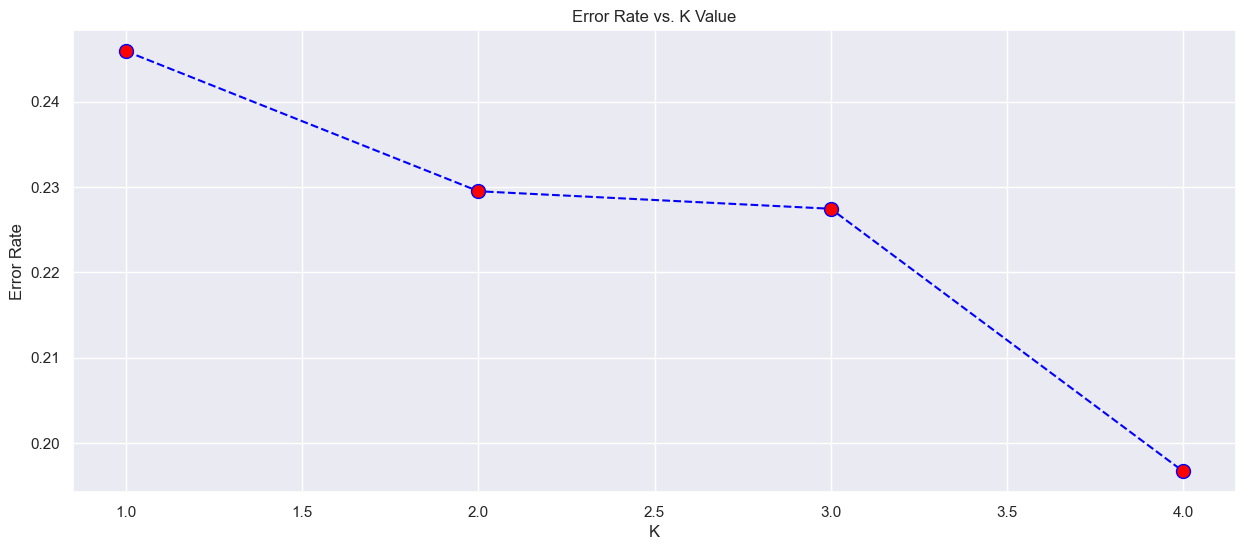

In [39]:
plt.figure(figsize=(15,6))
plt.plot(
    range(1,5),error_rate,color='blue',
    linestyle='dashed',
    marker='o',
    markerfacecolor='red',
    markersize=10
)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [40]:
KNN = KNeighborsClassifier(n_neighbors=4)

KNN.fit(X_train, y_train)
y_pred= KNN.predict(X_test)

print('The accuracy of the model : ', accuracy_score(y_test, y_pred) )
print('The precision of the model : ', precision_score(y_test, y_pred, average='micro'))
print('The recall of the model : ', recall_score(y_test, y_pred, average='micro'))
print('The f1 score of the model : ', f1_score(y_test, y_pred, average='micro'))
print('The classification report of the model : \n\n', classification_report(y_test,y_pred))

The accuracy of the model :  0.8032786885245902
The precision of the model :  0.8032786885245902
The recall of the model :  0.8032786885245902
The f1 score of the model :  0.8032786885245902
The classification report of the model : 

               precision    recall  f1-score   support

           0       0.80      0.83      0.82       258
           1       0.80      0.77      0.79       230

    accuracy                           0.80       488
   macro avg       0.80      0.80      0.80       488
weighted avg       0.80      0.80      0.80       488



In [30]:
# RD to the win

In [126]:
import pickle
pickle.dump(DNN, open('D:/Final Project Deployment/SuccLocationDNN.pkl','wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

# Bulid final output

In [41]:
labor = pd.read_csv('FinalDataSets/laborRateFinal.csv')
rate = labor['Rate'][26]

RiyadhPop = pd.read_csv('RiydahPopFinal.csv')
AgeGroup = pd.read_csv('AgeGroupFinalFinal.csv')
AgeGroupLabor = pd.read_excel('LaborByGender.xlsx')
shops = pd.read_excel('ExamLable.xlsx')
rent = pd.read_csv('FinalDataSets/rentFinal.csv')

#(Data[['officeNum', 'HotelNum', 'companieNum', 'dine_in','FemalePop','MalePop','neighbhood_id']])

In [42]:
RiyadhPop

,Unnamed: 0,FemaleNonSaudi,MaleNonSaudi,FemaleSaudi,MaleSaudi,neighbhood,nameAr,lat_max,lng_max,lat_min,lng_min,Teens,20s,30s,40s,50s,60s,total_labor,neighbhood_id
0,0,5106,9369,11245,12313,al muruj,المروج,24.769534,46.677388,24.744163,46.647911,4719,8093,9750,5584,2819,1147,22447,55
1,1,8176,10513,15195,17643,al masif,المصيف,24.777117,46.695304,24.753086,46.669045,6393,10965,13209,7565,3820,1554,30412,46
2,2,2744,3335,7809,7625,at taawn,التعاون,24.784686,46.713297,24.760641,46.687056,2669,4578,5515,3158,1595,649,12697,114
3,3,3600,5596,9286,9817,al izdihar,الازدهار,24.792240,46.731282,24.768222,46.705012,3511,6022,7254,4154,2098,853,16702,27
4,4,6061,10177,12367,14562,king fahd,الملك فهد,24.753086,46.685839,24.727401,46.656220,5356,9186,11066,6337,3200,1302,25478,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,156,17,191,902,1159,al mahdiyah,المهدية,24.675539,46.605587,24.618425,46.466336,281,482,581,333,168,68,1339,36
157,157,2441,3781,6419,6411,al shohada,الشهداء,24.799772,46.749213,24.775802,46.722983,2364,4054,4884,2797,1412,574,11244,61
158,158,353,1106,163,152,al dho,الدحو,24.630716,46.716933,24.627512,46.712819,220,377,454,260,131,53,1047,14
159,159,245,1019,2532,2554,al bariah,البرية,24.595852,47.008905,24.499157,46.869737,787,1351,1627,932,470,191,3747,12


In [43]:
RiyadhPop['lat_center'] = (RiyadhPop['lat_max'] + RiyadhPop['lat_min'])/2 
RiyadhPop['lng_center'] = (RiyadhPop['lng_max'] + RiyadhPop['lng_min'])/2 
RiyadhPop

,Unnamed: 0,FemaleNonSaudi,MaleNonSaudi,FemaleSaudi,MaleSaudi,neighbhood,nameAr,lat_max,lng_max,lat_min,lng_min,Teens,20s,30s,40s,50s,60s,total_labor,neighbhood_id,lat_center,lng_center
0,0,5106,9369,11245,12313,al muruj,المروج,24.769534,46.677388,24.744163,46.647911,4719,8093,9750,5584,2819,1147,22447,55,24.756848,46.662649
1,1,8176,10513,15195,17643,al masif,المصيف,24.777117,46.695304,24.753086,46.669045,6393,10965,13209,7565,3820,1554,30412,46,24.765101,46.682175
2,2,2744,3335,7809,7625,at taawn,التعاون,24.784686,46.713297,24.760641,46.687056,2669,4578,5515,3158,1595,649,12697,114,24.772664,46.700177
3,3,3600,5596,9286,9817,al izdihar,الازدهار,24.792240,46.731282,24.768222,46.705012,3511,6022,7254,4154,2098,853,16702,27,24.780231,46.718147
4,4,6061,10177,12367,14562,king fahd,الملك فهد,24.753086,46.685839,24.727401,46.656220,5356,9186,11066,6337,3200,1302,25478,133,24.740243,46.671029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,156,17,191,902,1159,al mahdiyah,المهدية,24.675539,46.605587,24.618425,46.466336,281,482,581,333,168,68,1339,36,24.646982,46.535961
157,157,2441,3781,6419,6411,al shohada,الشهداء,24.799772,46.749213,24.775802,46.722983,2364,4054,4884,2797,1412,574,11244,61,24.787787,46.736098
158,158,353,1106,163,152,al dho,الدحو,24.630716,46.716933,24.627512,46.712819,220,377,454,260,131,53,1047,14,24.629114,46.714876
159,159,245,1019,2532,2554,al bariah,البرية,24.595852,47.008905,24.499157,46.869737,787,1351,1627,932,470,191,3747,12,24.547505,46.939321


In [44]:
shops.columns

Index(['Unnamed: 0', 'place_id', 'name', 'neighbhood', 'nameAr', 'lat', 'lng',
       'types', 'rating', 'user_ratings_total', 'rated1', 'rated2', 'rated3',
       'rated4', 'rated5', 'delivery', 'dine_in', 'isLoved', 'schoolNum',
       'companieNum', 'officeNum', 'HotelNum', 'parksNum', 'revenues',
       'FemaleNonSaudi', 'MaleNonSaudi', 'FemaleSaudi', 'MaleSaudi',
       'total_labor', 'Teens', '20s', '30s', '40s', '50s', '60s',
       'cluster_label', 'LowRates', 'HighRates', 'neighbhood_id'],
      dtype='object')

In [45]:
shops.drop(columns=['Unnamed: 0', 'place_id', 'name', 'rated1', 'rated2', 'rated3',
       'rated4', 'rated5','revenues','FemaleNonSaudi', 'MaleNonSaudi', 'FemaleSaudi', 'MaleSaudi',
       'total_labor', 'Teens', '20s', '30s', '40s', '50s', '60s','LowRates', 'HighRates', ], inplace = True )
shops

,neighbhood,nameAr,lat,lng,types,rating,user_ratings_total,delivery,dine_in,isLoved,schoolNum,companieNum,officeNum,HotelNum,parksNum,cluster_label,neighbhood_id
0,al muruj,المروج,24.765344,46.670992,Coffee,4,201,False,True,1,20,20,19,16,10,1,19
1,siyah,صياح,24.606903,46.706532,Coffee,4,477,True,True,0,20,6,9,3,6,0,20
2,al izdihar,الازدهار,24.775514,46.708765,Restaurants,3,471,True,True,0,20,20,15,18,9,1,100
3,al mahdiyah,المهدية,24.642315,46.545398,Restaurants,3,477,True,True,1,19,11,3,15,1,0,55
4,hittin,حطين,24.760087,46.603459,Restaurants,4,201,True,True,1,10,17,7,2,2,1,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,al ulaya,العليا,24.713552,46.675296,Restaurants,0,0,True,True,0,20,20,20,20,6,0,9
1813,al mahdiyah,المهدية,24.621780,46.522452,Coffee,0,0,True,True,0,20,5,2,4,0,0,65
1814,dhahrat namar,ظهرة نمار,24.570301,46.613558,Restaurants,3,1405,True,True,1,20,13,8,14,3,1,96
1815,areed,عريض,24.487150,46.622172,Restaurants,0,0,True,True,0,18,3,1,0,1,0,48


In [46]:
shops.rename(columns = {'cluster_label':'isSuccessful'}, inplace = True) 

In [47]:
AgeGroupLabor

,AgeGroup,Female,Male,F_rate,M_rate
0,15-19,51291,21435,0.005292,0.011440
1,20-29,2288515,460656,0.236109,0.245865
2,30-39,3557536,654242,0.367035,0.349188
3,40-49,2458593,516393,0.253656,0.275614
4,50-59,1128193,203187,0.116397,0.108447
5,60-65,208500,17697,0.021511,0.009445


In [48]:
AgeGroup

,Unnamed: 0,Age_Group,Population,ratio
0,0,Teens,869719,12.408391
1,1,20s,1491605,21.280917
2,2,30s,1796847,25.635843
3,3,40s,1029081,14.682029
4,4,50s,519688,7.414454
5,5,60s,211492,3.017383


In [49]:
vals = RiyadhPop[['neighbhood','neighbhood_id']].value_counts().index
NeiDict = {}
for i in range(len(vals)):
    NeiDict[vals[i][1]] = vals[i][0]

In [50]:
def radias(r, lat, lng):
    
    maxlat = lat + r
    minlat = lat - r
    maxlng = lng + r
    minlng = lng - r
    
    return maxlat, minlat, maxlng, minlng

In [116]:
def Profile(lat, lng):
    Profile = pd.DataFrame(columns= ['neighbhoodName', 'FemalePop', 'MalePop', 
                                     'Teens', '20s', '30s', '40s', '50s', '60s',
                                     'officeNum','HotelNum', 'companieNum', 'schoolNum', 'parksNum',
                                     'CompNum', 'AVGRent', 'WillSucces'])

    #get ['FemalePop','MalePop','neighbhood_id'] using RiyadhPop Dataset
    df = RiyadhPop[(lat <= RiyadhPop['lat_max']) & (lat >= RiyadhPop['lat_min']) &
                    (lng <= RiyadhPop['lng_max']) &(lng >= RiyadhPop['lng_min'])]
    
    df.reset_index(drop=True, inplace=True)
    
    FemalePop = int((df['FemaleNonSaudi'].sum() + df['FemaleSaudi'].sum())/ (len(df)*2))
    Profile.loc[0,'FemalePop'] = FemalePop
    MalePop = int((df['MaleNonSaudi'].sum() + df['MaleSaudi'].sum())/ (len(df)*2))
    Profile.loc[0,'MalePop'] = MalePop

    R = []
    for i in range(len(df)):
        r = abs(lat - df['lat_center'][i]) + abs(lng - df['lng_center'][i])
        R.append(r)

    index = np.argmax(R)
    neighbhood_id = df['neighbhood_id'][index]
    neighbhoodName = NeiDict.get(neighbhood_id)
    Profile.loc[0,'neighbhoodName'] = neighbhoodName

    
    #Get ['officeNum', 'HotelNum', 'companieNum', 'CompNum'] using Shops Dataset
    maxlat, minlat, maxlng, minlng = radias(0.01500, lat, lng)
    
    df = shops[(shops['lat'] <= maxlat) & (shops['lat'] >= minlat) & (shops['lng'] <= maxlng) & (shops['lng'] >= minlng)]
    df.reset_index(drop=True, inplace=True)

    officeNum = 0
    try:
        officeNum = int(df['officeNum'].sum()/ len(df))
        Profile.loc[0,'officeNum'] = int(df['officeNum'].sum()/ len(df))
    except: 
        Profile.loc[0,'officeNum'] = officeNum

    HotelNum = 0
    try:
        HotelNum = int(df['HotelNum'].sum()/ len(df))
        Profile.loc[0,'HotelNum'] = int(df['HotelNum'].sum()/ len(df))
    except:
        Profile.loc[0,'HotelNum'] = HotelNum

    companieNum = 0
    try:
        companieNum = int(df['companieNum'].sum()/ len(df))
        Profile.loc[0,'companieNum'] = int(df['companieNum'].sum()/ len(df))
    except:
        Profile.loc[0,'companieNum'] = companieNum

    schoolNum = 0 
    try:
        schoolNum = int(df['schoolNum'].sum()/ len(df))
        Profile.loc[0, 'schoolNum'] = int(df['schoolNum'].sum()/ len(df))
    except:
        Profile.loc[0, 'schoolNum'] = schoolNum

    parksNum = 0
    try:
        parksNum = int(df['parksNum'].sum()/ len(df))
        Profile.loc[0, 'parksNum'] = int(df['parksNum'].sum()/ len(df))
    except:
        Profile.loc[0, 'parksNum'] = parksNum
        
    CompNum = 0
    try: 
        df = df[df['isSuccessful'] == 1]
        CompNum = len(df)
        Profile.loc[0, 'CompNum'] = len(df)
    except:
        Profile.loc[0, 'CompNum'] = CompNum

    #predict succ 
    myData = scaler.transform([[lat,lng, schoolNum, parksNum, officeNum, HotelNum, companieNum, CompNum]])
    Succ = DNN.predict(myData)
    Profile.loc[0,'WillSucces'] = Succ[0][0] * 100

    #Get Avg Rent Prices in loc 
    df = rent[(rent['location.lat'] <= maxlat) & (rent['location.lat'] >= minlat) & (rent['location.lng'] <= maxlng) & (rent['location.lng'] >= minlng)]
    df.reset_index(drop=True, inplace=True)

    AVGRent = 0
    try:
        AVGRent = int(df['price'].sum()/ len(df))
        Profile.loc[0,'AVGRent'] = AVGRent
    except:
        AVGRent = 'Sorry No Data Found'

    #AgeGroups 
    Profile.loc[0,'Teens'] = int((FemalePop+MalePop)* (AgeGroup['ratio'][0]/100))
    Profile.loc[0,'20s'] = int((FemalePop+MalePop)* (AgeGroup['ratio'][1]/100))	
    Profile.loc[0,'30s'] = int((FemalePop+MalePop)* (AgeGroup['ratio'][2]/100))
    Profile.loc[0,'40s'] = int((FemalePop+MalePop)* (AgeGroup['ratio'][3]/100))	
    Profile.loc[0,'50s'] = int((FemalePop+MalePop)* (AgeGroup['ratio'][4]/100))	
    Profile.loc[0,'60s'] = int((FemalePop+MalePop)* (AgeGroup['ratio'][5]/100))

    return Profile

In [117]:
lat = 24.785469 
lng = 46.741690
Profile(lat, lng)

1/1 [==============================] - 0s 38ms/step


,neighbhoodName,FemalePop,MalePop,Teens,20s,30s,40s,50s,60s,officeNum,HotelNum,companieNum,schoolNum,parksNum,CompNum,AVGRent,WillSucces
0,al hamra,6157,6687,1593,2733,3292,1885,952,387,14,19,18,20,6,23,1345832,84.251136


In [118]:
lat = 24.882328
lng = 46.802600
Profile(lat, lng)

1/1 [==============================] - 0s 38ms/step


,neighbhoodName,FemalePop,MalePop,Teens,20s,30s,40s,50s,60s,officeNum,HotelNum,companieNum,schoolNum,parksNum,CompNum,AVGRent,WillSucces
0,king khalid airport,1542,15533,2118,3633,4377,2506,1266,515,0,0,0,0,0,0,60000,0.007942


In [119]:
lat = 24.815519
lng = 46.605159
Profile(lat, lng)

1/1 [==============================] - 0s 37ms/step


,neighbhoodName,FemalePop,MalePop,Teens,20s,30s,40s,50s,60s,officeNum,HotelNum,companieNum,schoolNum,parksNum,CompNum,AVGRent,WillSucces
0,an narjis,1023,3455,555,952,1147,657,332,135,16,9,20,14,3,13,286929,76.871705


In [120]:
lat = 24.644886
lng = 46.606477
Profile(lat, lng)

1/1 [==============================] - 0s 34ms/step


,neighbhoodName,FemalePop,MalePop,Teens,20s,30s,40s,50s,60s,officeNum,HotelNum,companieNum,schoolNum,parksNum,CompNum,AVGRent,WillSucces
0,al hada,1931,2373,534,915,1103,631,319,129,1,0,5,4,2,0,101147,2.410608


In [121]:
#مقهى ديرة 
lat = 24.635134
lng = 46.658191
Profile(lat, lng)

1/1 [==============================] - 0s 38ms/step


,neighbhoodName,FemalePop,MalePop,Teens,20s,30s,40s,50s,60s,officeNum,HotelNum,companieNum,schoolNum,parksNum,CompNum,AVGRent,WillSucces
0,al uraija,1976,2591,566,971,1170,670,338,137,0,3,2,13,2,0,2869333,11.078168


In [122]:
lat = 24.704694
lng = 46.792591
Profile(lat, lng)

1/1 [==============================] - 0s 34ms/step


,neighbhoodName,FemalePop,MalePop,Teens,20s,30s,40s,50s,60s,officeNum,HotelNum,companieNum,schoolNum,parksNum,CompNum,AVGRent,WillSucces
0,ar rayan,11583,11786,2899,4973,5990,3431,1732,705,6,9,8,20,10,0,103731,38.371256


In [123]:
lat = 24.687250
lng = 46.777301
Profile(lat, lng)

1/1 [==============================] - 0s 14ms/step


,neighbhoodName,FemalePop,MalePop,Teens,20s,30s,40s,50s,60s,officeNum,HotelNum,companieNum,schoolNum,parksNum,CompNum,AVGRent,WillSucces
0,ar rabwah,13776,14312,3485,5977,7200,4123,2082,847,11,12,10,20,6,0,222111,25.780872


In [124]:
lat = 24.558958
lng = 46.751498
Profile(lat, lng)

1/1 [==============================] - 0s 36ms/step


,neighbhoodName,FemalePop,MalePop,Teens,20s,30s,40s,50s,60s,officeNum,HotelNum,companieNum,schoolNum,parksNum,CompNum,AVGRent,WillSucces
0,badr,10074,15778,3207,5501,6627,3795,1916,780,8,3,18,14,5,0,51166,29.377618


In [84]:
Data.tail(5)

,Unnamed: 0.1,Unnamed: 0,neighbhood_id,lat,lng,types,delivery,dine_in,schoolNum,companieNum,officeNum,HotelNum,parksNum,total_labor,Teens,20s,30s,40s,50s,60s,FemalePop,MalePop,Succ,TotPop,neighbhood,CompNum
2435,2435,2435,70,24.790299,46.672270,0,1,1,20,20,20,20,5,16967,3567,6117,7369,4220,2131,867,12616,16130,1,28746,ar rayan,36
2436,2436,2436,29,24.716602,46.697853,0,1,1,20,20,20,20,6,28817,6058,10390,12516,7168,3620,1473,21418,27407,1,48825,ar raid,21
2437,2437,2437,76,24.801610,46.673787,0,1,1,20,20,20,20,6,28817,6058,10390,12516,7168,3620,1473,21418,27407,1,48825,ar rahmaniyah,13
2438,2438,2438,90,24.697761,46.729985,0,1,1,20,20,20,20,4,28817,6058,10390,12516,7168,3620,1473,21418,27407,1,48825,an nur,7
2439,2439,2439,74,24.826857,46.728078,0,1,1,20,20,11,20,11,8465,1778,3051,3676,2105,1062,431,6351,7990,1,14341,ar rimal,10


In [87]:
shops

,neighbhood,nameAr,lat,lng,types,rating,user_ratings_total,delivery,dine_in,isLoved,schoolNum,companieNum,officeNum,HotelNum,parksNum,isSuccessful,neighbhood_id
0,al muruj,المروج,24.765344,46.670992,Coffee,4,201,False,True,1,20,20,19,16,10,1,19
1,siyah,صياح,24.606903,46.706532,Coffee,4,477,True,True,0,20,6,9,3,6,0,20
2,al izdihar,الازدهار,24.775514,46.708765,Restaurants,3,471,True,True,0,20,20,15,18,9,1,100
3,al mahdiyah,المهدية,24.642315,46.545398,Restaurants,3,477,True,True,1,19,11,3,15,1,0,55
4,hittin,حطين,24.760087,46.603459,Restaurants,4,201,True,True,1,10,17,7,2,2,1,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,al ulaya,العليا,24.713552,46.675296,Restaurants,0,0,True,True,0,20,20,20,20,6,0,9
1813,al mahdiyah,المهدية,24.621780,46.522452,Coffee,0,0,True,True,0,20,5,2,4,0,0,65
1814,dhahrat namar,ظهرة نمار,24.570301,46.613558,Restaurants,3,1405,True,True,1,20,13,8,14,3,1,96
1815,areed,عريض,24.487150,46.622172,Restaurants,0,0,True,True,0,18,3,1,0,1,0,48


In [88]:
#myData = scaler.transform([[lat,lng, schoolNum, parksNum, officeNum, HotelNum, companieNum, CompNum]])
myData = scaler.transform([[24.765344,46.670992, 20, 10	, 19, 16, 20, 10]])
Succ= DNN.predict(myData)

1/1 [==============================] - 0s 18ms/step


In [89]:
Succ

array([[0.824889]], dtype=float32)

In [143]:
rating = pd.read_csv('ShopsFinalFinal.csv')
rating

,Unnamed: 0,place_id,name,neighbhood,nameAr,lat,lng,types,rating,user_ratings_total,rated1,rated2,rated3,rated4,rated5,delivery,dine_in,isLoved,schoolNum,companieNum,officeNum,HotelNum,parksNum,revenues,FemaleNonSaudi,MaleNonSaudi,FemaleSaudi,MaleSaudi,total_labor,Teens,20s,30s,40s,50s,60s
0,0,ChIJO4BL8MsFLz4RCqUrCLW-sMU,Pakistani Restaurant,al futah,الفوطة,24.641529,46.718225,Restaurants,4,23,0,0,0,0,5,True,True,1,20,20,20,17,13,132209,3413,12133,772,1126,10295,2164,3712,4471,2561,1293,526
1,1,ChIJKaxgO9oFLz4RtMaaknmISZ8,Mangalore Restaurant,al futah,الفوطة,24.644261,46.718130,Restaurants,4,20,0,0,0,0,0,True,True,0,20,20,20,17,12,135463,3413,12133,772,1126,10295,2164,3712,4471,2561,1293,526
2,2,ChIJ_d5QeFIFLz4RRBFh7LboDXM,"SAGAR RESTAURANT, Batha",al futah,الفوطة,24.639784,46.716217,Restaurants,4,37,0,0,0,0,5,True,True,0,20,20,20,16,14,145027,3413,12133,772,1126,10295,2164,3712,4471,2561,1293,526
3,3,ChIJQa6TpTwFLz4RAfvt1R-FFLw,Alimsha Family Restaurant( lucky restaurant),al futah,الفوطة,24.640358,46.716083,Restaurants,4,24,0,0,0,1,4,True,True,1,20,20,20,17,14,138500,3413,12133,772,1126,10295,2164,3712,4471,2561,1293,526
4,4,ChIJT07SO6wFLz4RJmjRZxVTt1I,Regency Restaurant,al futah,الفوطة,24.640834,46.715976,Restaurants,4,186,1,0,1,2,2,False,True,0,20,20,20,15,14,138500,3413,12133,772,1126,10295,2164,3712,4471,2561,1293,526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,1812,ChIJV5MtNlmrLz4RiWPIV-MK4p0,كافي شوب,khashm al an,خشم العان,24.747919,46.856083,Coffee,0,0,0,0,0,0,0,True,True,0,16,1,5,4,5,74111,1794,2866,29863,38313,42989,9037,15500,18672,10693,5400,2197
1813,1813,ChIJF7vib-arLz4RvOOKchWCW-k,Dunkin' Donuts,khashm al an,خشم العان,24.745859,46.857525,Coffee,0,0,0,0,0,0,0,True,True,0,16,1,5,3,2,72428,1794,2866,29863,38313,42989,9037,15500,18672,10693,5400,2197
1814,1814,ChIJeWlO0BsCLz4RrXmMU5E0Mkk,مقهى مور 7,al quds,القدس,24.754235,46.741076,Coffee,3,164,3,1,1,0,1,True,True,0,13,15,13,18,5,165384,3653,4415,17097,17091,24940,5243,8992,10832,6204,3133,1275
1815,1815,ChIJBfGMtYIDLz4R8cte_B2KVG4,عنوان القهوة,al quds,القدس,24.754433,46.745696,Coffee,3,116,2,1,0,1,5,True,True,0,15,20,14,14,7,173213,3653,4415,17097,17091,24940,5243,8992,10832,6204,3133,1275


In [144]:
rating['CompNum'] = 0
for i in range(len(shops)):
    maxlat, minlat, maxlng, minlng = radias(0.01500, rating['lat'][i], rating['lng'][i])
    df = Data[(Data['lat'] < maxlat) & (Data['lat'] > minlat) & (Data['lng'] < maxlng) & (Data['lng'] > minlng)]
    df = df[df['Succ'] == 1]
    rating['CompNum'][i] = len(df)
rating

,Unnamed: 0,place_id,name,neighbhood,nameAr,lat,lng,types,rating,user_ratings_total,rated1,rated2,rated3,rated4,rated5,delivery,dine_in,isLoved,schoolNum,companieNum,officeNum,HotelNum,parksNum,revenues,FemaleNonSaudi,MaleNonSaudi,FemaleSaudi,MaleSaudi,total_labor,Teens,20s,30s,40s,50s,60s,CompNum
0,0,ChIJO4BL8MsFLz4RCqUrCLW-sMU,Pakistani Restaurant,al futah,الفوطة,24.641529,46.718225,Restaurants,4,23,0,0,0,0,5,True,True,1,20,20,20,17,13,132209,3413,12133,772,1126,10295,2164,3712,4471,2561,1293,526,28
1,1,ChIJKaxgO9oFLz4RtMaaknmISZ8,Mangalore Restaurant,al futah,الفوطة,24.644261,46.718130,Restaurants,4,20,0,0,0,0,0,True,True,0,20,20,20,17,12,135463,3413,12133,772,1126,10295,2164,3712,4471,2561,1293,526,26
2,2,ChIJ_d5QeFIFLz4RRBFh7LboDXM,"SAGAR RESTAURANT, Batha",al futah,الفوطة,24.639784,46.716217,Restaurants,4,37,0,0,0,0,5,True,True,0,20,20,20,16,14,145027,3413,12133,772,1126,10295,2164,3712,4471,2561,1293,526,27
3,3,ChIJQa6TpTwFLz4RAfvt1R-FFLw,Alimsha Family Restaurant( lucky restaurant),al futah,الفوطة,24.640358,46.716083,Restaurants,4,24,0,0,0,1,4,True,True,1,20,20,20,17,14,138500,3413,12133,772,1126,10295,2164,3712,4471,2561,1293,526,27
4,4,ChIJT07SO6wFLz4RJmjRZxVTt1I,Regency Restaurant,al futah,الفوطة,24.640834,46.715976,Restaurants,4,186,1,0,1,2,2,False,True,0,20,20,20,15,14,138500,3413,12133,772,1126,10295,2164,3712,4471,2561,1293,526,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,1812,ChIJV5MtNlmrLz4RiWPIV-MK4p0,كافي شوب,khashm al an,خشم العان,24.747919,46.856083,Coffee,0,0,0,0,0,0,0,True,True,0,16,1,5,4,5,74111,1794,2866,29863,38313,42989,9037,15500,18672,10693,5400,2197,6
1813,1813,ChIJF7vib-arLz4RvOOKchWCW-k,Dunkin' Donuts,khashm al an,خشم العان,24.745859,46.857525,Coffee,0,0,0,0,0,0,0,True,True,0,16,1,5,3,2,72428,1794,2866,29863,38313,42989,9037,15500,18672,10693,5400,2197,6
1814,1814,ChIJeWlO0BsCLz4RrXmMU5E0Mkk,مقهى مور 7,al quds,القدس,24.754235,46.741076,Coffee,3,164,3,1,1,0,1,True,True,0,13,15,13,18,5,165384,3653,4415,17097,17091,24940,5243,8992,10832,6204,3133,1275,19
1815,1815,ChIJBfGMtYIDLz4R8cte_B2KVG4,عنوان القهوة,al quds,القدس,24.754433,46.745696,Coffee,3,116,2,1,0,1,5,True,True,0,15,20,14,14,7,173213,3653,4415,17097,17091,24940,5243,8992,10832,6204,3133,1275,19


In [145]:
x = rating[['lat', 'lng' , 'schoolNum', 'parksNum', 'officeNum', 'HotelNum', 'companieNum', 'CompNum']]
myData = scaler.transform(x)
Succ= DNN.predict(x)
Succ = [1 if i >= .5 else 0 for i in Succ ]
rating['isSuccessful'] = Succ

57/57 [==============================] - 0s 2ms/step


In [146]:
rating

,Unnamed: 0,place_id,name,neighbhood,nameAr,lat,lng,types,rating,user_ratings_total,rated1,rated2,rated3,rated4,rated5,delivery,dine_in,isLoved,schoolNum,companieNum,officeNum,HotelNum,parksNum,revenues,FemaleNonSaudi,MaleNonSaudi,FemaleSaudi,MaleSaudi,total_labor,Teens,20s,30s,40s,50s,60s,CompNum,isSuccessful
0,0,ChIJO4BL8MsFLz4RCqUrCLW-sMU,Pakistani Restaurant,al futah,الفوطة,24.641529,46.718225,Restaurants,4,23,0,0,0,0,5,True,True,1,20,20,20,17,13,132209,3413,12133,772,1126,10295,2164,3712,4471,2561,1293,526,28,1
1,1,ChIJKaxgO9oFLz4RtMaaknmISZ8,Mangalore Restaurant,al futah,الفوطة,24.644261,46.718130,Restaurants,4,20,0,0,0,0,0,True,True,0,20,20,20,17,12,135463,3413,12133,772,1126,10295,2164,3712,4471,2561,1293,526,26,1
2,2,ChIJ_d5QeFIFLz4RRBFh7LboDXM,"SAGAR RESTAURANT, Batha",al futah,الفوطة,24.639784,46.716217,Restaurants,4,37,0,0,0,0,5,True,True,0,20,20,20,16,14,145027,3413,12133,772,1126,10295,2164,3712,4471,2561,1293,526,27,1
3,3,ChIJQa6TpTwFLz4RAfvt1R-FFLw,Alimsha Family Restaurant( lucky restaurant),al futah,الفوطة,24.640358,46.716083,Restaurants,4,24,0,0,0,1,4,True,True,1,20,20,20,17,14,138500,3413,12133,772,1126,10295,2164,3712,4471,2561,1293,526,27,1
4,4,ChIJT07SO6wFLz4RJmjRZxVTt1I,Regency Restaurant,al futah,الفوطة,24.640834,46.715976,Restaurants,4,186,1,0,1,2,2,False,True,0,20,20,20,15,14,138500,3413,12133,772,1126,10295,2164,3712,4471,2561,1293,526,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,1812,ChIJV5MtNlmrLz4RiWPIV-MK4p0,كافي شوب,khashm al an,خشم العان,24.747919,46.856083,Coffee,0,0,0,0,0,0,0,True,True,0,16,1,5,4,5,74111,1794,2866,29863,38313,42989,9037,15500,18672,10693,5400,2197,6,0
1813,1813,ChIJF7vib-arLz4RvOOKchWCW-k,Dunkin' Donuts,khashm al an,خشم العان,24.745859,46.857525,Coffee,0,0,0,0,0,0,0,True,True,0,16,1,5,3,2,72428,1794,2866,29863,38313,42989,9037,15500,18672,10693,5400,2197,6,0
1814,1814,ChIJeWlO0BsCLz4RrXmMU5E0Mkk,مقهى مور 7,al quds,القدس,24.754235,46.741076,Coffee,3,164,3,1,1,0,1,True,True,0,13,15,13,18,5,165384,3653,4415,17097,17091,24940,5243,8992,10832,6204,3133,1275,19,0
1815,1815,ChIJBfGMtYIDLz4R8cte_B2KVG4,عنوان القهوة,al quds,القدس,24.754433,46.745696,Coffee,3,116,2,1,0,1,5,True,True,0,15,20,14,14,7,173213,3653,4415,17097,17091,24940,5243,8992,10832,6204,3133,1275,19,1


In [147]:
for i in range(len(rating)):
    tot = rating.loc[i, 'user_ratings_total'] 
    sum = rating.loc[i, 'rated1'] + rating.loc[i, 'rated2'] + rating.loc[i, 'rated3'] + rating.loc[i, 'rated4'] + rating.loc[i, 'rated5']
    if sum == 0 :
        pass
    else:
        rating.loc[i, 'rated1'] = int((rating.loc[i, 'rated1']/ sum) * tot)
        rating.loc[i, 'rated2'] = int((rating.loc[i, 'rated2']/ sum) * tot)
        rating.loc[i, 'rated3'] = int((rating.loc[i, 'rated3']/ sum) * tot)
        rating.loc[i, 'rated4'] = int((rating.loc[i, 'rated4']/ sum) * tot)
        rating.loc[i, 'rated5'] = int((rating.loc[i, 'rated5']/ sum) * tot)
        
rating

,Unnamed: 0,place_id,name,neighbhood,nameAr,lat,lng,types,rating,user_ratings_total,rated1,rated2,rated3,rated4,rated5,delivery,dine_in,isLoved,schoolNum,companieNum,officeNum,HotelNum,parksNum,revenues,FemaleNonSaudi,MaleNonSaudi,FemaleSaudi,MaleSaudi,total_labor,Teens,20s,30s,40s,50s,60s,CompNum,isSuccessful
0,0,ChIJO4BL8MsFLz4RCqUrCLW-sMU,Pakistani Restaurant,al futah,الفوطة,24.641529,46.718225,Restaurants,4,23,0,0,0,0,23,True,True,1,20,20,20,17,13,132209,3413,12133,772,1126,10295,2164,3712,4471,2561,1293,526,28,1
1,1,ChIJKaxgO9oFLz4RtMaaknmISZ8,Mangalore Restaurant,al futah,الفوطة,24.644261,46.718130,Restaurants,4,20,0,0,0,0,0,True,True,0,20,20,20,17,12,135463,3413,12133,772,1126,10295,2164,3712,4471,2561,1293,526,26,1
2,2,ChIJ_d5QeFIFLz4RRBFh7LboDXM,"SAGAR RESTAURANT, Batha",al futah,الفوطة,24.639784,46.716217,Restaurants,4,37,0,0,0,0,37,True,True,0,20,20,20,16,14,145027,3413,12133,772,1126,10295,2164,3712,4471,2561,1293,526,27,1
3,3,ChIJQa6TpTwFLz4RAfvt1R-FFLw,Alimsha Family Restaurant( lucky restaurant),al futah,الفوطة,24.640358,46.716083,Restaurants,4,24,0,0,0,4,19,True,True,1,20,20,20,17,14,138500,3413,12133,772,1126,10295,2164,3712,4471,2561,1293,526,27,1
4,4,ChIJT07SO6wFLz4RJmjRZxVTt1I,Regency Restaurant,al futah,الفوطة,24.640834,46.715976,Restaurants,4,186,31,0,31,62,62,False,True,0,20,20,20,15,14,138500,3413,12133,772,1126,10295,2164,3712,4471,2561,1293,526,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,1812,ChIJV5MtNlmrLz4RiWPIV-MK4p0,كافي شوب,khashm al an,خشم العان,24.747919,46.856083,Coffee,0,0,0,0,0,0,0,True,True,0,16,1,5,4,5,74111,1794,2866,29863,38313,42989,9037,15500,18672,10693,5400,2197,6,0
1813,1813,ChIJF7vib-arLz4RvOOKchWCW-k,Dunkin' Donuts,khashm al an,خشم العان,24.745859,46.857525,Coffee,0,0,0,0,0,0,0,True,True,0,16,1,5,3,2,72428,1794,2866,29863,38313,42989,9037,15500,18672,10693,5400,2197,6,0
1814,1814,ChIJeWlO0BsCLz4RrXmMU5E0Mkk,مقهى مور 7,al quds,القدس,24.754235,46.741076,Coffee,3,164,82,27,27,0,27,True,True,0,13,15,13,18,5,165384,3653,4415,17097,17091,24940,5243,8992,10832,6204,3133,1275,19,0
1815,1815,ChIJBfGMtYIDLz4R8cte_B2KVG4,عنوان القهوة,al quds,القدس,24.754433,46.745696,Coffee,3,116,25,12,0,12,64,True,True,0,15,20,14,14,7,173213,3653,4415,17097,17091,24940,5243,8992,10832,6204,3133,1275,19,1


In [125]:
RiyadhPop.to_csv('D:/Final Project Deployment/Data/RiyadhPop.csv')
Data.to_csv('D:/Final Project Deployment/Data/balenced.csv')
labor.to_csv('D:/Final Project Deployment/Data/labor.csv')
AgeGroup.to_csv('D:/Final Project Deployment/Data/AgeGroup.csv')
AgeGroupLabor.to_csv('D:/Final Project Deployment/Data/AgeGroupLabor.csv')
shops.to_csv('D:/Final Project Deployment/Data/shops.csv')
rent.to_csv('D:/Final Project Deployment/Data/rent.csv')

In [148]:
rating.to_csv('D:/Final Project Deployment/Data/ClassifiedShopes.csv')